# Problem 3

## Add image augmentation to the network in Problem 1 and report whether training and validation accuracy with the combined regularization and augmentation differ significantly from the original results obtained on the network with augmentation only. Train your network on half the number of epochs as in the original notebook

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [2]:
import os, shutil
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline


# Since the directories has been created in the Problem1and2.ipynb, here we will be just accessing the folders.

In [3]:
original_dataset_dir = '/home/ec2-user/data/train'
base_dir = '/home/ec2-user/data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')


validation_dir = os.path.join(base_dir, 'validation')


test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')


# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')


# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')


# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')





In [8]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
    
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
    
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


* Once again, here for image augmentation, I have chosen all the seven parameters shown in the textbook instead of choosing just 4 as was suggested in the Problem 2 statement. 

In [9]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

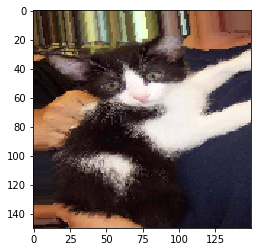

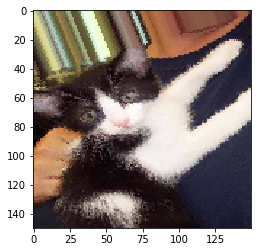

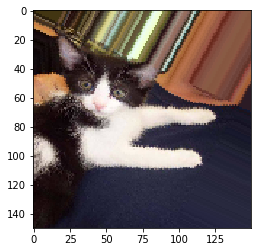

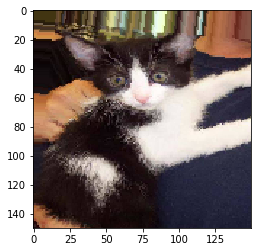

In [10]:
from keras.preprocessing import image                           
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[2]                                            

img = image.load_img(img_path, target_size=(150, 150))          

x = image.img_to_array(img)                                     
x = x.reshape((1,) + x.shape)                                   

i = 0                                                           
for batch in datagen.flow(x, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                      
    if i % 4 == 0:                                              
        break                                                   

plt.show()

## As one can see, there is a dropout layer and a L2 regularizer with a lambda value of 0.0001 in the below model layers addition

In [11]:
from keras import layers
from keras import models
from keras import regularizers

model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.0001),activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
model_3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Running for 100 epochs

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)               

train_generator = train_datagen.flow_from_directory(
        train_dir,                                              
        target_size=(150, 150),                                 
        batch_size=32,
        class_mode='binary')                                    

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model_3.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 30s 299ms/step - loss: 0.7703 - acc: 0.5134 - val_loss: 0.7470 - val_acc: 0.5063
Epoch 2/100
100/100 [==============================] - 22s 221ms/step - loss: 0.7363 - acc: 0.5666 - val_loss: 0.7467 - val_acc: 0.5477
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.7156 - acc: 0.5778 - val_loss: 0.6858 - val_acc: 0.6409
Epoch 4/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6861 - acc: 0.6219 - val_loss: 0.6523 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6708 - acc: 0.6459 - val_loss: 0.6388 - val_acc: 0.6789
Epoch 6/100
100/100 [==============================] - 24s 238ms/step - loss: 0.6495 - acc: 0.6566 - val_loss: 0.6219 - val_acc: 0.7036
Epoch 7/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6439 - acc: 0.6613 -

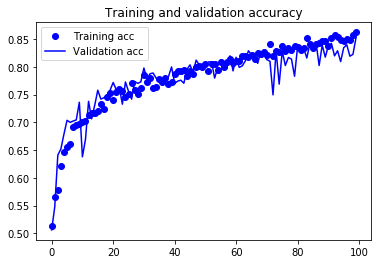

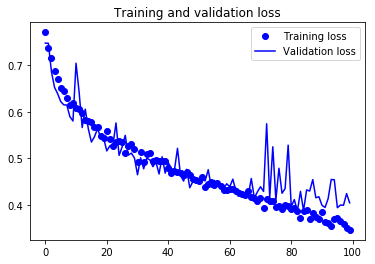

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conlusion 

* As observed from the above plots, 
    1. The validation accuracy with L2 regularization and a dropout layer in Problem 3 : 80% - 85%
    2. The validation accuracy with just L2 regularization in Problem 1  : 70% - 75%
* Also, there is very less to no overfitting in Problem 3 with L2 regularization and a dropout layer